<a href="https://colab.research.google.com/github/Taejin1221/MachineLearning/blob/master/Trajectory_Augmentation/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Modules

In [1]:
import glob, time, cv2, os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
CURR_DIR = '/content/'

X_DATA_DIR =  CURR_DIR + 'train_x_data'
Y_DATA_DIR = CURR_DIR + 'train_y_data'
TEST_DIR = CURR_DIR + 'test_data'

In [3]:
IMG_SIZE = 256

# Make Data

In [4]:
x_data = np.linspace( -10, 10, 50 )

y_data1 = x_data
y_data2 = x_data ** 2
y_data3 = x_data ** 3 

Y_data = [ y_data1, y_data2, y_data3 ]

In [5]:
file_list = os.listdir(  )

if ( X_DATA_DIR not in file_list ):
    os.mkdir( X_DATA_DIR )

if ( Y_DATA_DIR not in file_list ):
    os.mkdir( Y_DATA_DIR )

if ( TEST_DIR not in file_list ):
    os.mkdir( TEST_DIR )

In [6]:
n = len( Y_data ) * 10

figSize = ( IMG_SIZE / 100, IMG_SIZE / 100 )

os.chdir( X_DATA_DIR )
for i in range( n ):
    plt.figure( figsize = figSize, dpi = 100 )

    plt.plot( x_data, Y_data[i // 10], 'k.' )
    plt.axis( [ -10, 10, -50, 50 ] )
    plt.axis( 'off' )

    fileName = '0' + str( i ) if i < 10 else i
    plt.savefig( f'graph_x_{ fileName }.png'  )
    plt.clf()
    plt.close()

os.chdir( Y_DATA_DIR )
for i in range( n ):
    plt.figure( figsize = figSize, dpi = 100 )

    plt.plot( x_data, Y_data[i // 10], 'k-' )
    plt.axis( [ -10, 10, -50, 50 ] )
    plt.axis( 'off' )

    fileName = '0' + str( i ) if i < 10 else i
    plt.savefig( f'graph_y_{ fileName }.png'  )
    plt.clf()
    plt.close

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

In [7]:
dataSize = len( x_data )
os.chdir( TEST_DIR )

plt.figure( figsize = figSize, dpi = 100 )

plt.plot( [ -2, 0, 2 ], [ -2, 0, 2 ], 'k.' )
plt.axis( [ -10, 10, -50, 50 ] )
plt.axis( 'off' )

plt.savefig( f'graph_test_0.png'  )
plt.clf()


plt.figure( figsize = figSize, dpi = 100 )

plt.plot( [ -2, 0, 2 ], [ 4, 0, 4 ], 'k.' )
plt.axis( 'off' )

plt.savefig( f'graph_test_1.png'  )
plt.clf()


plt.figure( figsize = figSize, dpi = 100 )

plt.plot( [ -2, 0, 2 ], [ -8, 0, 8 ], 'k.' )
plt.axis( 'off' )

plt.savefig( f'graph_test_2.png'  )
plt.clf()


<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

# Load Data

In [8]:
x_data, y_data = [ ], [ ]
x_test = [ ]

os.chdir( X_DATA_DIR )
files = glob.glob( '*png' )
for file in files:
    x_data.append( 255 - cv2.imread( file, 0 ) )

os.chdir( Y_DATA_DIR )
files = glob.glob( '*png' )
for file in files:
    y_data.append( 255 - cv2.imread( file, 0 ) )

os.chdir( TEST_DIR )
files = glob.glob( '*png' )
for file in files:
    x_test.append( 255 - cv2.imread( file, 0 ) )

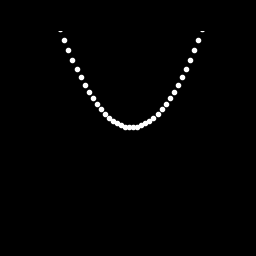

In [9]:
from google.colab.patches import cv2_imshow

cv2_imshow( x_data[0] )

In [10]:
x_data = np.array( x_data )
y_data = np.array( y_data )
x_test = np.array( x_test )

x_data = x_data.astype( 'float32' ) / 255.
y_data = y_data.astype( 'float32' ) / 255.
x_test = x_test.astype( 'float32' ) / 255.

x_data = np.reshape( x_data, ( len( x_data ), IMG_SIZE, IMG_SIZE, 1 ) )
y_data = np.reshape( y_data, ( len( y_data ), IMG_SIZE, IMG_SIZE, 1 ) )
x_test = np.reshape( x_test, ( len( x_test ), IMG_SIZE, IMG_SIZE, 1 ) )

In [11]:
x_data.shape

(30, 256, 256, 1)

# Build Models

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [13]:
BUFFER_SIZE = 30
BATCH_SIZE = 10
train_dataset = tf.data.Dataset.from_tensor_slices(x_data).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

## Build Generator Model

In [14]:
generator = keras.Sequential( name = 'generator' )

generator.add( layers.Input( [ IMG_SIZE, IMG_SIZE, 1 ] ) )

# output shape ( 128, 128, 32 )
generator.add( layers.Conv2DTranspose( 32, ( 5, 5 ), padding = 'same', use_bias = False ) )
generator.add( layers.BatchNormalization( ) )
generator.add( layers.LeakyReLU( ) )

# output shape ( 64, 64, 64 )
generator.add( layers.Conv2DTranspose( 64, ( 5, 5 ), padding = 'same', use_bias = False ) )
generator.add( layers.BatchNormalization( ) )
generator.add( layers.LeakyReLU( ) )

 # output shape ( 128, 128, 64 )
generator.add( layers.Conv2DTranspose( 128, ( 5, 5 ), padding = 'same', use_bias = False ) )
generator.add( layers.BatchNormalization( ) )
generator.add( layers.LeakyReLU( ) )

# output shape ( 256, 256, 32 )
generator.add( layers.Conv2DTranspose( 256, ( 5, 5 ), padding = 'same', use_bias = False ) )
generator.add( layers.BatchNormalization( ) )
generator.add( layers.LeakyReLU( ) )

# output shape ( 256, 256, 1 )
generator.add( layers.Conv2DTranspose( 1, ( 5, 5 ), padding = 'same', use_bias = False, activation = 'tanh' ) )

In [28]:
# generator.compile( )
# generator.summary()

Model: "generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_transpose (Conv2DTran (None, 256, 256, 32)      800       
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 32)      128       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 256, 256, 32)      0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 256, 256, 64)      51200     
_________________________________________________________________
batch_normalization_1 (Batch (None, 256, 256, 64)      256       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256, 256, 64)      0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 256, 256, 128)     20

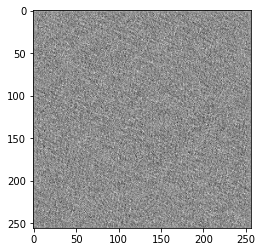

In [16]:
noise = tf.random.normal( [ 1, IMG_SIZE, IMG_SIZE, 1 ] )
generated_image = generator( noise, training = False )

plt.imshow( generated_image[ 0, :, :, 0 ], cmap = 'gray' )

In [17]:
generated_image.shape

TensorShape([1, 256, 256, 1])

## Build Discriminator Model

In [18]:
discriminator = keras.Sequential( name = 'discriminator' )

discriminator.add( layers.Conv2D( 32, ( 5, 5 ), strides = ( 2, 2 ), padding = 'same',
                                 input_shape = [ IMG_SIZE, IMG_SIZE, 1 ] ) )
discriminator.add( layers.LeakyReLU( ) )
discriminator.add( layers.Dropout( 0.3 ) )

discriminator.add( layers.Conv2D( 64, ( 5, 5 ), strides = ( 2, 2 ), padding = 'same' ) )
discriminator.add( layers.LeakyReLU( ) )
discriminator.add( layers.Dropout( 0.3 ) )

discriminator.add( layers.Conv2D( 128, ( 5, 5 ), strides = ( 2, 2 ), padding = 'same' ) )
discriminator.add( layers.LeakyReLU( ) )
discriminator.add( layers.Dropout( 0.3 ) )

discriminator.add( layers.Flatten( ) )
discriminator.add( layers.Dense( 1 ) )

In [19]:
decision = discriminator( generated_image )
print( decision )

tf.Tensor([[0.00947993]], shape=(1, 1), dtype=float32)


# Train the models

## Define loss and optimizers

In [20]:
cross_entropy = keras.losses.BinaryCrossentropy( from_logits = True )

In [21]:
def discriminator_loss( real_output, fake_output ):
    real_loss = cross_entropy( tf.ones_like( real_output ), real_output )
    fake_loss = cross_entropy( tf.zeros_like( fake_output ), fake_output )

    total_loss = real_loss + fake_loss
    
    return total_loss

def generator_loss( fake_output ):
    return cross_entropy( tf.ones_like( fake_output ), fake_output )

In [22]:
generator_optimizer = tf.keras.optimizers.Adam( 1e-4 )
discriminator_optimizer = tf.keras.optimizers.Adam( 1e-4 )

## Define Hyperparameter

In [23]:
EPOCHS = 500
noise_dim = 100
num_examples_to_generate = 16

## Define Train Function

In [24]:
@tf.function
def train_step( images ):
    noise = tf.random.normal( [ BATCH_SIZE, IMG_SIZE, IMG_SIZE, 1 ] )

    with tf.GradientTape( ) as gen_tape, tf.GradientTape( ) as disc_tape:
      generated_images = generator( noise, training = True )

      real_output = discriminator( images, training = True )
      fake_output = discriminator( generated_images, training = True )

      gen_loss = generator_loss( fake_output )
      disc_loss = discriminator_loss( real_output, fake_output )

    gradients_of_generator = gen_tape.gradient( gen_loss, generator.trainable_variables )
    gradients_of_discriminator = disc_tape.gradient( disc_loss, discriminator.trainable_variables )

    generator_optimizer.apply_gradients( zip( gradients_of_generator, generator.trainable_variables ) )
    discriminator_optimizer.apply_gradients( zip( gradients_of_discriminator, discriminator.trainable_variables ) )

def train( dataset, epochs ):
  for epoch in range( epochs ):
    start = time.time( )

    for image_batch in dataset:
      train_step( image_batch )

    print( 'Time for epoch {} is {} sec'.format( epoch + 1, time.time( ) - start ) )

In [25]:
train( train_dataset, EPOCHS )

Time for epoch 1 is 6.804634094238281 sec
Time for epoch 2 is 1.6128342151641846 sec
Time for epoch 3 is 1.6033201217651367 sec
Time for epoch 4 is 1.614579200744629 sec
Time for epoch 5 is 1.611891746520996 sec
Time for epoch 6 is 1.616546869277954 sec
Time for epoch 7 is 1.6171789169311523 sec
Time for epoch 8 is 1.6192266941070557 sec
Time for epoch 9 is 1.6239733695983887 sec
Time for epoch 10 is 1.6236228942871094 sec
Time for epoch 11 is 1.6276164054870605 sec
Time for epoch 12 is 1.6268198490142822 sec
Time for epoch 13 is 1.624039649963379 sec
Time for epoch 14 is 1.6341631412506104 sec
Time for epoch 15 is 1.63118314743042 sec
Time for epoch 16 is 1.6367754936218262 sec
Time for epoch 17 is 1.6402244567871094 sec
Time for epoch 18 is 1.6418828964233398 sec
Time for epoch 19 is 1.6400749683380127 sec
Time for epoch 20 is 1.6427876949310303 sec
Time for epoch 21 is 1.641834020614624 sec
Time for epoch 22 is 1.6416528224945068 sec
Time for epoch 23 is 1.6415174007415771 sec
Time 

# Test Model

<Figure size 432x288 with 0 Axes>

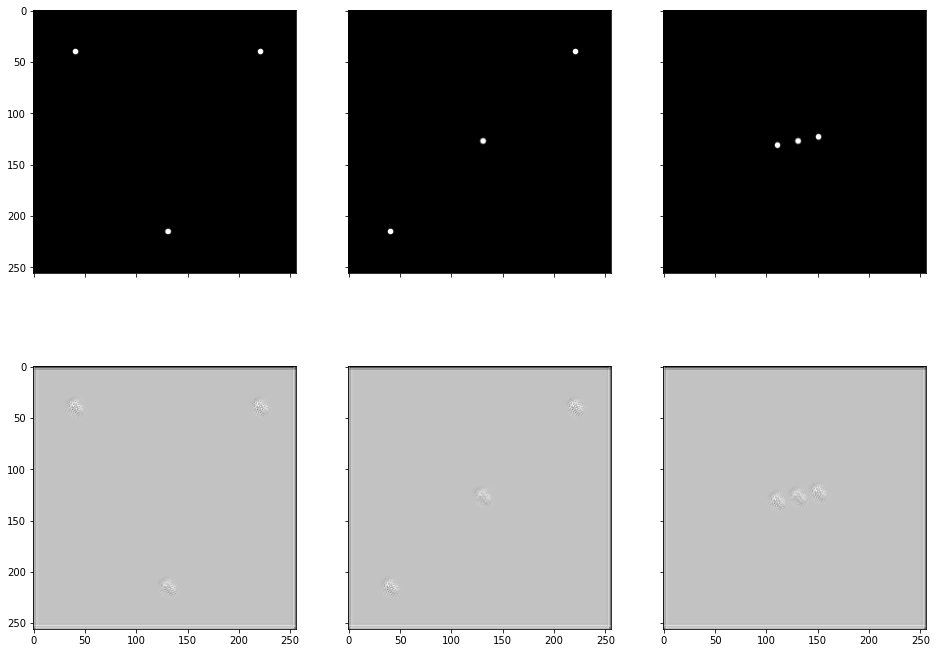

In [27]:
predicted_images = generator( x_test )
plt.gray()
n = 3
fig, ax = plt.subplots( 2, 3, True, True, figsize = ( 16, 12 ) )
for i in range( n ):
    ax[0][i].imshow( x_test[i].reshape( 256, 256 ) )

    ax[1][i].imshow( tf.reshape( predicted_images[i], ( 256, 256 ) ) )
plt.savefig( 'Result.png' )